In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
# Reading the file

df = pd.read_excel('C:\\Users\\lenovo\\Projects\\Tillit_Data_Science_Tech_Test.xlsx')

In [3]:
# Viewing the read file

df.head()

,borrower_id,loan_amnt,term,emp_title,emp_length,home_ownership,annual_inc,outcome,purpose,addr_state,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,537185,16075.0,60 months,NaN,NaN,MORTGAGE,50289.0,Fully Paid,home_improvement,SC,...,0.0,2.0,95.7,100.0,0.0,0,227376.0,15756.0,11900.0,6000.0
1,1810804,8000.0,36 months,Graydon Head & Ritchey LLP,10+ years,MORTGAGE,64000.0,Fully Paid,debt_consolidation,IN,...,0.0,0.0,100.0,75.0,1.0,0,121881.0,33618.0,13700.0,29400.0
2,388855,23700.0,36 months,Director of IT,3 years,RENT,88000.0,Fully Paid,debt_consolidation,FL,...,0.0,5.0,100.0,10.0,1.0,0,99201.0,58898.0,18700.0,69501.0
3,1137067,1200.0,36 months,NaN,NaN,MORTGAGE,81000.0,Fully Paid,other,NY,...,0.0,4.0,83.3,100.0,0.0,0,203983.0,20609.0,1100.0,26183.0
4,14585,3500.0,36 months,NaN,NaN,RENT,11736.0,Fully Paid,debt_consolidation,WA,...,0.0,1.0,100.0,100.0,1.0,0,16200.0,9459.0,2000.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41029 entries, 0 to 41028
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borrower_id                     41029 non-null  int64         
 1   loan_amnt                       41006 non-null  float64       
 2   term                            41029 non-null  object        
 3   emp_title                       36311 non-null  object        
 4   emp_length                      36628 non-null  object        
 5   home_ownership                  41029 non-null  object        
 6   annual_inc                      41029 non-null  float64       
 7   outcome                         41029 non-null  object        
 8   purpose                         41029 non-null  object        
 9   addr_state                      41029 non-null  object        
 10  dti                             41029 non-null  float64       
 11  de

<Axes: xlabel='outcome', ylabel='count'>

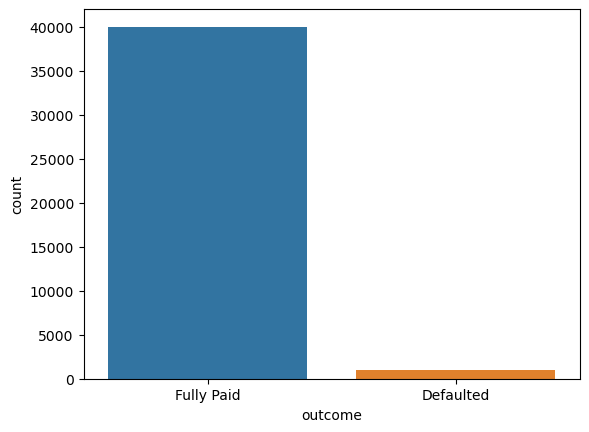

In [5]:
# Plot the outcome column

sns.countplot(x = 'outcome', data = df)

In [6]:
# Checking the counts of both categories (shows data imbalance)

df['outcome'].value_counts()

outcome
Fully Paid    40029
Defaulted      1000
Name: count, dtype: int64

Seeing the value counts of the outcome above, the data is imbalanced.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27748\1657582804.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'], kde = False, bins = 40)


<Axes: xlabel='loan_amnt'>

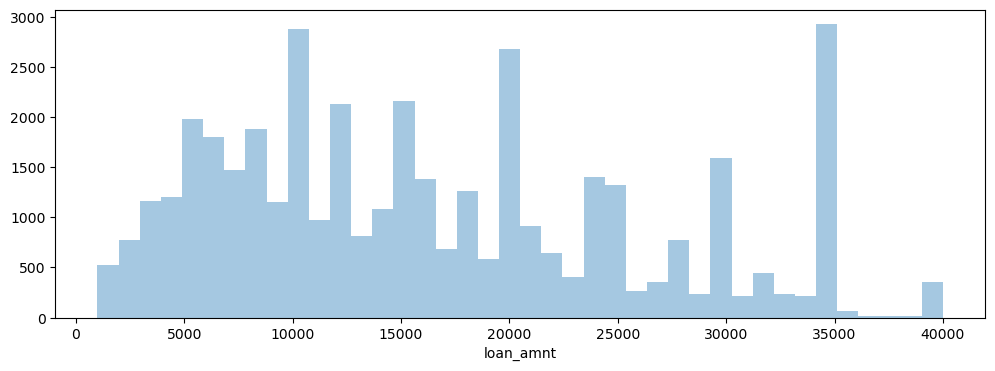

In [7]:
# Histogram plot to see the loan amount

plt.subplots(figsize = (12, 4))
sns.distplot(df['loan_amnt'], kde = False, bins = 40)

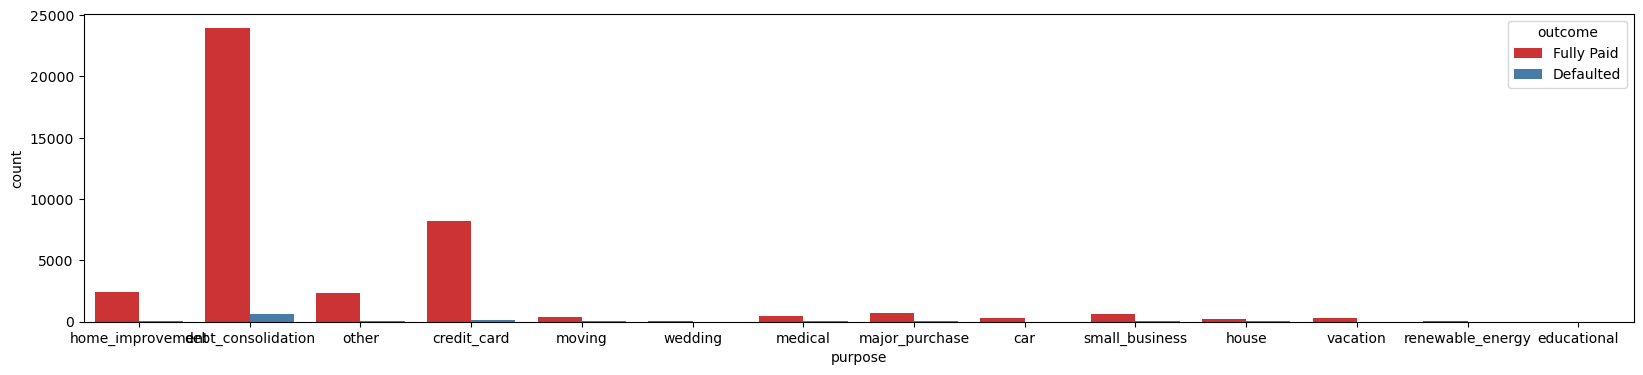

In [8]:
# Countplot to observe the loan repayment with respect to purpose

plt.figure(figsize = (20, 4))
sns.countplot(x = 'purpose', hue = 'outcome', data = df, palette = 'Set1')
plt.show()

In [9]:
# Checking missing values in the dataset

missing_values = df.isnull().sum()

# Set the display options to show all rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display column names with missing values

print(missing_values[missing_values > 0])

loan_amnt                            23
emp_title                          4718
emp_length                         4401
mths_since_last_delinq            21154
mths_since_last_record            34213
revol_util                           24
mths_since_last_major_derog       30378
tot_coll_amt                       2404
tot_cur_bal                        2404
open_acc_6m                       27678
open_act_il                       27678
open_il_12m                       27678
open_il_24m                       27678
mths_since_rcnt_il                28014
total_bal_il                      27678
il_util                           29355
open_rv_12m                       27678
open_rv_24m                       27678
max_bal_bc                        27678
all_util                          27680
total_rev_hi_lim                   2404
inq_fi                            27678
total_cu_tl                       27678
inq_last_12m                      27678
acc_open_past_24mths               1649


In [10]:
# Percentage of missing values

missing_percentage = 100* df.isnull().sum()/len(df)

# Set the display options to show all rows and columns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display column names with missing values

print(missing_percentage[missing_values > 0])

loan_amnt                          0.056058
emp_title                         11.499184
emp_length                        10.726559
mths_since_last_delinq            51.558654
mths_since_last_record            83.387360
revol_util                         0.058495
mths_since_last_major_derog       74.040313
tot_coll_amt                       5.859270
tot_cur_bal                        5.859270
open_acc_6m                       67.459602
open_act_il                       67.459602
open_il_12m                       67.459602
open_il_24m                       67.459602
mths_since_rcnt_il                68.278535
total_bal_il                      67.459602
il_util                           71.546955
open_rv_12m                       67.459602
open_rv_24m                       67.459602
max_bal_bc                        67.459602
all_util                          67.464476
total_rev_hi_lim                   5.859270
inq_fi                            67.459602
total_cu_tl                     

In [11]:
# Employment length

sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [12]:
order_emp = ['< 1 year',
         '1 year',
         '2 years',
         '3 years',
         '4 years',
         '5 years',
         '6 years',
         '7 years',
         '8 years',
         '9 years',
         '10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

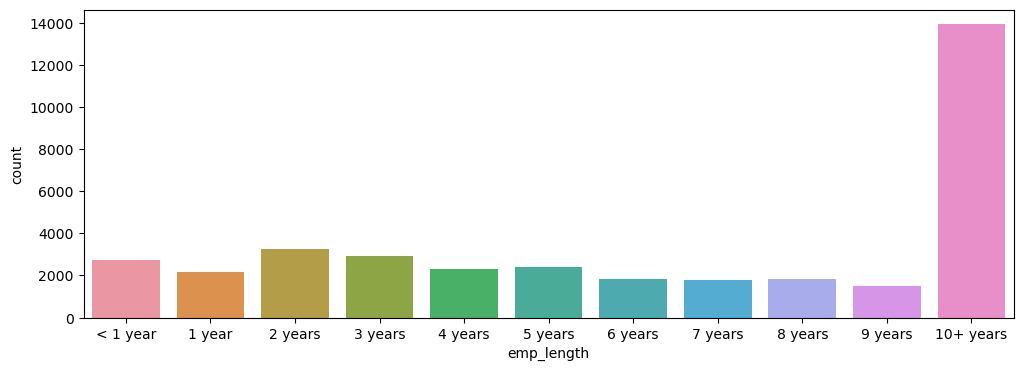

In [13]:
plt.figure(figsize=(12,4))

sns.countplot(x = 'emp_length', data = df, order = order_emp)

<Axes: xlabel='emp_length', ylabel='count'>

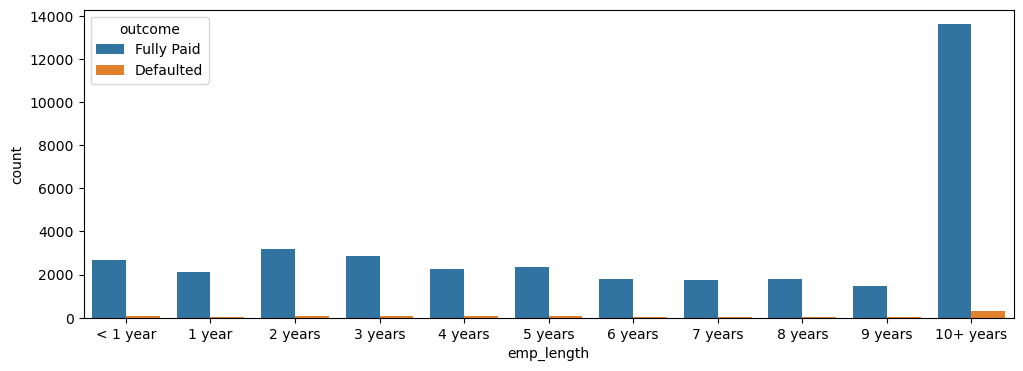

In [14]:
# Plotting the employment length and outcome

plt.figure(figsize = (12, 4))
sns.countplot(x = 'emp_length', data = df, order = order_emp, hue = 'outcome')

Removing some irrelevant columns from the dataset

In [15]:
df = df.drop(['borrower_id', 'emp_title', 'purpose', 'addr_state', 'earliest_cr_line'], axis=1)

In [16]:
df.head()

,loan_amnt,term,emp_length,home_ownership,annual_inc,outcome,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,16075.0,60 months,NaN,MORTGAGE,50289.0,Fully Paid,12.27,0,0,47.0,NaN,7,0,11843,78.4,24,0,NaN,0,0.0,220753.0,1.0,1.0,0.0,1.0,21.0,3913.0,65.0,1.0,2.0,8507.0,75.0,15100.0,0.0,3.0,3.0,4.0,31536.0,1574.0,86.8,0,0,126.0,195.0,6.0,6.0,3.0,6.0,NaN,8.0,47.0,0.0,3.0,5.0,3.0,8.0,8.0,5.0,13.0,5.0,7.0,0.0,0.0,0.0,2.0,95.7,100.0,0.0,0,227376.0,15756.0,11900.0,6000.0
1,8000.0,36 months,10+ years,MORTGAGE,64000.0,Fully Paid,19.93,0,0,NaN,85.0,8,1,12991,94.8,10,0,NaN,0,0.0,87945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13700.0,NaN,NaN,NaN,2.0,10993.0,709.0,94.8,0,0,181.0,73.0,28.0,14.0,1.0,28.0,NaN,22.0,NaN,0.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,0.0,100.0,75.0,1.0,0,121881.0,33618.0,13700.0,29400.0
2,23700.0,36 months,3 years,RENT,88000.0,Fully Paid,29.80,0,2,NaN,67.0,23,1,7296,24.6,40,0,NaN,0,0.0,58898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29700.0,NaN,NaN,NaN,16.0,2561.0,13085.0,30.0,0,0,42.0,99.0,3.0,3.0,0.0,3.0,NaN,0.0,NaN,0.0,3.0,5.0,10.0,20.0,7.0,20.0,33.0,5.0,23.0,0.0,0.0,0.0,5.0,100.0,10.0,1.0,0,99201.0,58898.0,18700.0,69501.0
3,1200.0,36 months,NaN,MORTGAGE,81000.0,Fully Paid,12.87,1,0,19.0,NaN,11,0,4496,35.1,19,0,51.0,0,0.0,171146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12800.0,NaN,NaN,NaN,8.0,15559.0,0.0,104.9,0,0,134.0,166.0,11.0,5.0,3.0,36.0,39.0,13.0,19.0,1.0,1.0,5.0,1.0,2.0,8.0,7.0,8.0,5.0,11.0,0.0,0.0,0.0,4.0,83.3,100.0,0.0,0,203983.0,20609.0,1100.0,26183.0
4,3500.0,36 months,NaN,RENT,11736.0,Fully Paid,31.39,0,0,NaN,109.0,7,1,9459,58.4,9,0,NaN,0,0.0,9459.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,1973.0,58.0,16200.0,0.0,0.0,1.0,2.0,1351.0,27.0,98.6,0,0,NaN,139.0,8.0,8.0,0.0,8.0,NaN,8.0,NaN,0.0,1.0,5.0,1.0,3.0,0.0,7.0,9.0,6.0,7.0,0.0,0.0,0.0,1.0,100.0,100.0,1.0,0,16200.0,9459.0,2000.0,0.0


In [17]:
# Printing the categorical variables

print('The categorical variables are:')
df.select_dtypes(['object']).columns

The categorical variables are:


Index(['term', 'emp_length', 'home_ownership', 'outcome'], dtype='object')

In [18]:
# Term

df['term'].value_counts()

term
36 months    30250
60 months    10779
Name: count, dtype: int64

In [19]:
# COnverting the term into numeric datatype

df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [20]:
# Dealing with employment year

df['emp_length'].replace(to_replace = '10+ years', value = '10 years', inplace = True)

In [21]:
df['emp_length'].replace(to_replace = '< 1 year', value = '0 years', inplace = True)

In [22]:
df['emp_length'] = df['emp_length'].apply(lambda emp_length: int(emp_length[:2]) if pd.notna(emp_length) else None)

In [23]:
# Dealing with Home Ownership

df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
dummies = dummies.astype(int)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [24]:
# Dealing with outcome

df['outcome'] = df['outcome'].map({'Fully Paid':0, 'Defaulted':1})

In [25]:
# Checking the dataset after converting all the categorical variables

df.head()

,loan_amnt,term,emp_length,annual_inc,outcome,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,OTHER,OWN,RENT
0,16075.0,60,NaN,50289.0,0,12.27,0,0,47.0,NaN,7,0,11843,78.4,24,0,NaN,0,0.0,220753.0,1.0,1.0,0.0,1.0,21.0,3913.0,65.0,1.0,2.0,8507.0,75.0,15100.0,0.0,3.0,3.0,4.0,31536.0,1574.0,86.8,0,0,126.0,195.0,6.0,6.0,3.0,6.0,NaN,8.0,47.0,0.0,3.0,5.0,3.0,8.0,8.0,5.0,13.0,5.0,7.0,0.0,0.0,0.0,2.0,95.7,100.0,0.0,0,227376.0,15756.0,11900.0,6000.0,0,0,0
1,8000.0,36,10.0,64000.0,0,19.93,0,0,NaN,85.0,8,1,12991,94.8,10,0,NaN,0,0.0,87945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13700.0,NaN,NaN,NaN,2.0,10993.0,709.0,94.8,0,0,181.0,73.0,28.0,14.0,1.0,28.0,NaN,22.0,NaN,0.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,7.0,0.0,0.0,0.0,0.0,100.0,75.0,1.0,0,121881.0,33618.0,13700.0,29400.0,0,0,0
2,23700.0,36,3.0,88000.0,0,29.80,0,2,NaN,67.0,23,1,7296,24.6,40,0,NaN,0,0.0,58898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29700.0,NaN,NaN,NaN,16.0,2561.0,13085.0,30.0,0,0,42.0,99.0,3.0,3.0,0.0,3.0,NaN,0.0,NaN,0.0,3.0,5.0,10.0,20.0,7.0,20.0,33.0,5.0,23.0,0.0,0.0,0.0,5.0,100.0,10.0,1.0,0,99201.0,58898.0,18700.0,69501.0,0,0,1
3,1200.0,36,NaN,81000.0,0,12.87,1,0,19.0,NaN,11,0,4496,35.1,19,0,51.0,0,0.0,171146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12800.0,NaN,NaN,NaN,8.0,15559.0,0.0,104.9,0,0,134.0,166.0,11.0,5.0,3.0,36.0,39.0,13.0,19.0,1.0,1.0,5.0,1.0,2.0,8.0,7.0,8.0,5.0,11.0,0.0,0.0,0.0,4.0,83.3,100.0,0.0,0,203983.0,20609.0,1100.0,26183.0,0,0,0
4,3500.0,36,NaN,11736.0,0,31.39,0,0,NaN,109.0,7,1,9459,58.4,9,0,NaN,0,0.0,9459.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,2.0,1973.0,58.0,16200.0,0.0,0.0,1.0,2.0,1351.0,27.0,98.6,0,0,NaN,139.0,8.0,8.0,0.0,8.0,NaN,8.0,NaN,0.0,1.0,5.0,1.0,3.0,0.0,7.0,9.0,6.0,7.0,0.0,0.0,0.0,1.0,100.0,100.0,1.0,0,16200.0,9459.0,2000.0,0.0,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41029 entries, 0 to 41028
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       41006 non-null  float64
 1   term                            41029 non-null  int64  
 2   emp_length                      36628 non-null  float64
 3   annual_inc                      41029 non-null  float64
 4   outcome                         41029 non-null  int64  
 5   dti                             41029 non-null  float64
 6   delinq_2yrs                     41029 non-null  int64  
 7   inq_last_6mths                  41029 non-null  int64  
 8   mths_since_last_delinq          19875 non-null  float64
 9   mths_since_last_record          6816 non-null   float64
 10  open_acc                        41029 non-null  int64  
 11  pub_rec                         41029 non-null  int64  
 12  revol_bal                       

Here in order to handle missing values, Iterative Imputer is used.
Because, it works well in handling various missing data patterns, takes advantage of relationships between features to impute missing values more accurately and it also improves model training.

In [27]:
# Handling Missing Values

from fancyimpute import IterativeImputer

imputer = IterativeImputer()
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [28]:
# Separating the features and the target variable

X = df_imputed.drop('outcome', axis = 1)
y = df_imputed['outcome']

In [29]:
# Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

In [30]:
# Splitting the dataset into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [31]:
# Displaying the dataset size after train_test_split

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (28720, 74)
Shape of X_test: (12309, 74)
Shape of y_train: (28720,)
Shape of y_test: (12309,)


 SMOTE Oversampling is used because the dataset is significantly imbalanced (The minority class has significantly fewer samples than the other).
 SMOTE improves the classifier performance on minority class, reduces overfitting risk.

In [39]:
# SMOTE
from imblearn.over_sampling import SMOTE

In [40]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

I have used XGBoost CLassifier for the predictive model. 

It handles non-linearity (this classifier can capture non-linear relationships and interactions between features providing better predictive accuracy).

It can handle the missing data (as this dataset has large amount of missing data).

It is robust to overfitting and provides feature importance.





In [41]:
# Train XGBoost on the resampled data

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [43]:
# Evaluate the model

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9779023478755382
Confusion Matrix:
[[12018    15]
 [  257    19]]


In [44]:
# Reports for XGB Classifier

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     12033
         1.0       0.56      0.07      0.12       276

    accuracy                           0.98     12309
   macro avg       0.77      0.53      0.56     12309
weighted avg       0.97      0.98      0.97     12309

0.9779023478755382
[[12018    15]
 [  257    19]]


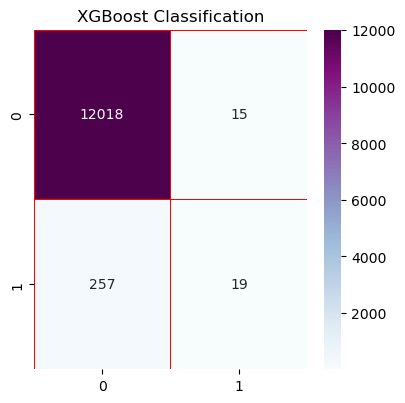

In [45]:
# Visualising COnfusion Matrix

xgb_cm = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(3, 3, 1) 
ax.set_title('XGBoost Classification')

sns.heatmap(data=xgb_cm, annot=True, linewidth=0.7, linecolor='red',cmap="BuPu" ,fmt='g', ax=ax)

plt.show()

In [46]:
# Hyperparameter tuning

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]  
}

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

random_search=RandomizedSearchCV(model, param_distributions = params, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 3)


random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [49]:
# Print the best parameters and the corresponding score

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.7}
Best Score: 0.798737613042119


In [50]:
# Make predictions on the test set using the best estimator

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [51]:
# Evaluate the best model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9779023478755382
Confusion Matrix:
 [[12030     3]
 [  269     7]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     12033
         1.0       0.70      0.03      0.05       276

    accuracy                           0.98     12309
   macro avg       0.84      0.51      0.52     12309
weighted avg       0.97      0.98      0.97     12309



C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

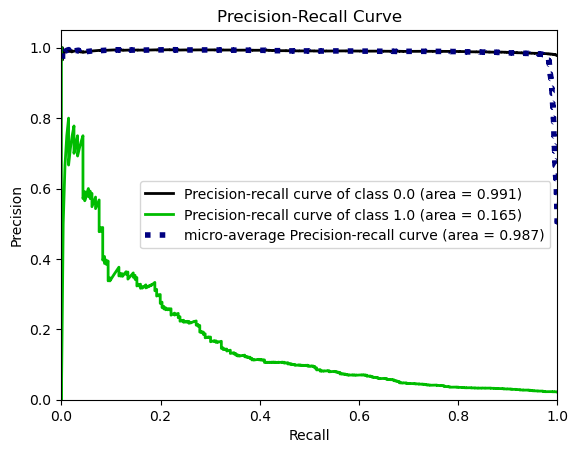

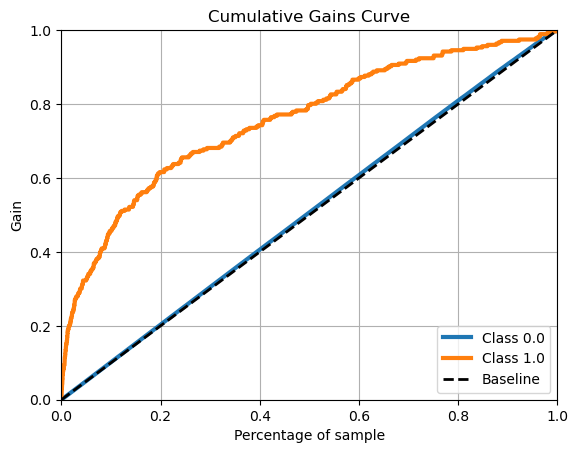

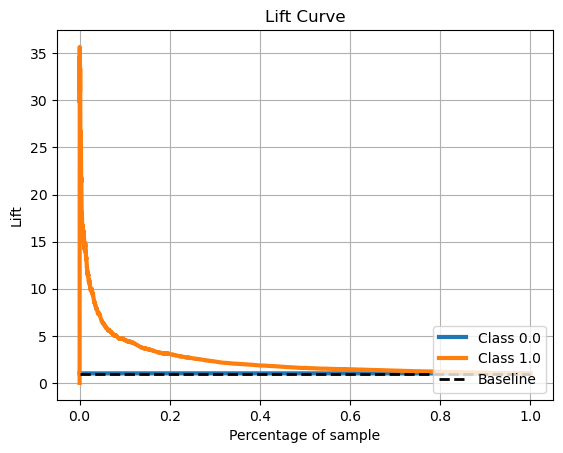

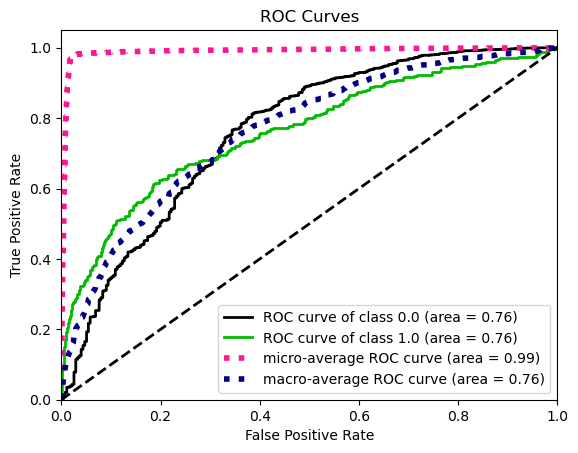

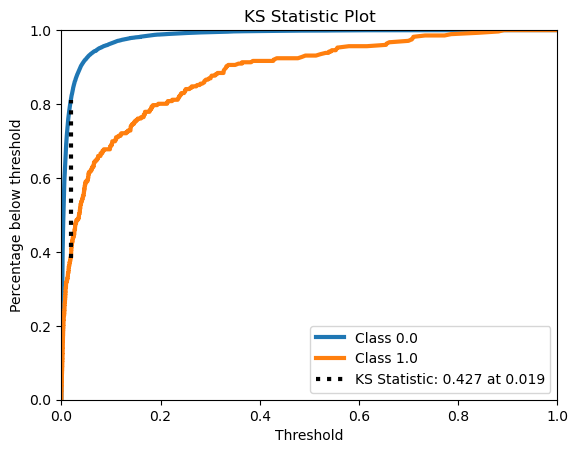

In [55]:
# Precision Recall Curve for XGB

import scikitplot as skplt

y_pred_test  =model.predict_proba(X_test)
skplt.metrics.plot_precision_recall_curve(y_test, y_pred_test)

skplt.metrics.plot_cumulative_gain(y_test,y_pred_test)
skplt.metrics.plot_lift_curve(y_test,y_pred_test)
skplt.metrics.plot_roc (y_test,y_pred_test)
y_pred_test  = model.predict_proba(X_test)
skplt.metrics.plot_ks_statistic(y_test,y_pred_test)

Here in this code, I have used almost all the columns (removed only few irrelevant columns like borrower_id, emp_title, purpose, addr_state and earliest_cr_line).



In [2]:
pip install tensorflow 

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7